# 문제

https://www.kaggle.com/competitions/titanic

# EDA (Exploratory Data Analysis)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
df_train = pd.read_csv("dataset/train.csv")
df_test = pd.read_csv("dataset/test.csv")
submission = pd.read_csv("dataset/gender_submission.csv")

In [3]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Null 값 체크 

- Pclass : 티켓의 클래스	1 = 1st, 2 = 2nd, 3 = 3rd 
- sex : 성별 male, female
- Age : 나이
- sibSp : 함께 탑승한 형제와 배우자의 수
- parch : 함께 탑승한 부모, 아이의 수
- ticket : 티켓 번호
- fare : 탑승료
- cabin : 객실 번호
- embared : 탑승항구

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_train.drop(columns="Cabin", inplace=True)
df_test.drop(columns="Cabin", inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

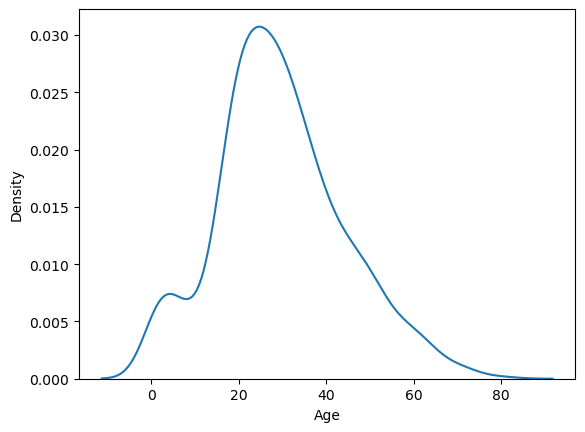

In [10]:
sns.kdeplot(df_train.dropna(subset="Age")["Age"])

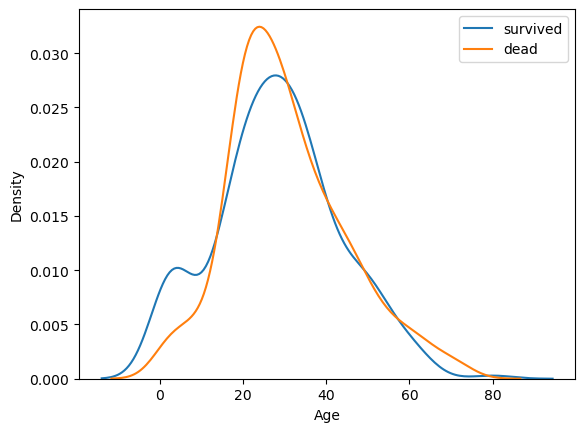

In [11]:
aa = df_train.dropna(subset="Age")
sns.kdeplot(aa[aa["Survived"] == 1]["Age"])
sns.kdeplot(aa[aa["Survived"] == 0]["Age"])
plt.legend(["survived", "dead"])

In [12]:
df_train.drop(columns="Age", inplace=True)
df_test.drop(columns="Age", inplace=True)

In [13]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN


In [14]:
pd.crosstab(df_train["Pclass"], df_train["Embarked"])

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


## 생존에 영향을 미칠 것 같은 feature 들을 생각해보고 가설을 세운다 
- 영화를 보면, 여자와 아이들은 먼저 구조선을 타고 탈출하던데.. 
- 높은 클래스 탑승객들이 더 많이 살았을까? 
- 비싼 티켓
- ...

In [15]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df_train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [17]:
df_train.groupby("Survived")["Embarked"].value_counts(normalize=True)

Survived  Embarked
0         S           0.777778
          C           0.136612
          Q           0.085610
1         S           0.638235
          C           0.273529
          Q           0.088235
Name: Embarked, dtype: float64

In [18]:
df_train.drop(columns="Embarked", inplace=True)
df_test.drop(columns="Embarked", inplace=True)

In [19]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [20]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64

In [21]:
df_test[df_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN


In [22]:
df_test[df_test["Ticket"] == '3701']

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN


In [23]:
df_test[df_test["Name"].str.contains("Thomas")].query("Pclass == 3")

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
58,950,3,"Davison, Mr. Thomas Henry",male,1,0,386525,16.1000
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,1,1,2625,8.5167
116,1008,3,"Thomas, Mr. John",male,0,0,2681,6.4375
133,1025,3,"Thomas, Mr. Charles P",male,1,0,2621,6.4375
152,1044,3,"Storey, Mr. Thomas",male,0,0,3701,NaN
228,1120,3,"Everett, Mr. Thomas James",male,0,0,C.A. 6212,15.1000
332,1224,3,"Thomas, Mr. Tannous",male,0,0,2684,7.2250
399,1291,3,"Conlon, Mr. Thomas Henry",male,0,0,21332,7.7333


In [24]:
df_train[df_train["Name"].str.contains("Thomas")].query("Pclass == 3")

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
159,160,0,3,"Sage, Master. Thomas Henry",male,8,2,CA. 2343,69.5500
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,1,0,370365,15.5000
260,261,0,3,"Smith, Mr. Thomas",male,0,0,384461,7.7500
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000
364,365,0,3,"O'Brien, Mr. Thomas",male,1,0,370365,15.5000
372,373,0,3,"Beavan, Mr. William Thomas",male,0,0,323951,8.0500
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,0,0,343095,8.0500
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,0,0,372622,7.7500
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,0,0,363294,8.0500
778,779,0,3,"Kilgannon, Mr. Thomas J",male,0,0,36865,7.7375


In [25]:
df_train.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [26]:
df_test.groupby("Pclass")["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [27]:
df_test.loc[df_test["Fare"].isnull(), "Fare"] = 13.675550

In [28]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [29]:
pd.crosstab(df_train["Survived"], df_train["Pclass"], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [30]:
pd.crosstab(df_train["Survived"], df_train["Sex"], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [31]:
df_train[df_train["Survived"] == 0]["Fare"].mean(), df_train[df_train["Survived"] == 1]["Fare"].mean()

(22.117886885245902, 48.39540760233918)

In [32]:
df_train = df_train.drop(columns=["Name", "Ticket"])
df_test = df_test.drop(columns=["Name", "Ticket"])

In [33]:
df_train = pd.get_dummies(df_train, prefix=None)
df_test = pd.get_dummies(df_test, prefix=None)

In [38]:
df_train = pd.concat([df_train.drop(columns="Pclass"), pd.get_dummies(df_train["Pclass"], prefix="pclass_")], axis=1)
df_test = pd.concat([df_test.drop(columns="Pclass"), pd.get_dummies(df_test["Pclass"], prefix="pclass_")], axis=1)

# 모델 개발 & 평가

- Logistic Regression
- DecisionTreeClassifier
- RandomForestClassifier 
- XGB

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train.drop(columns="Survived"), df_train["Survived"], test_size=0.2)

In [41]:
random_state = 1
models = {
    "logit" : LogisticRegression(solver="liblinear", random_state=random_state), 
    "dt" :  DecisionTreeClassifier(random_state=random_state), 
    "rf" :  RandomForestClassifier(n_estimators=200, random_state=random_state), 
    "xgb" :  XGBClassifier(random_state=random_state),
}

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(name, ":", round(accuracy_score(y_valid, y_pred), 5))

logit : 0.84358
dt : 0.77654
rf : 0.81564
xgb : 0.84358


In [43]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(name, ":", cross_val_score(model, df_train.drop(columns="Survived"), df_train["Survived"]))

logit : [0.80446927 0.80337079 0.78089888 0.76966292 0.81460674]
dt : [0.55865922 0.73595506 0.75842697 0.83146067 0.80898876]
rf : [0.63687151 0.81460674 0.82022472 0.80337079 0.80898876]
xgb : [0.6424581  0.74157303 0.80898876 0.81460674 0.81460674]


In [44]:
vot_clf = VotingClassifier(estimators=[
    (name, model) for name, model in models.items()
], voting="hard")
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logit',
                              LogisticRegression(random_state=1,
                                                 solver='liblinear')),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            earl...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=1, ...))])

In [45]:
y_pred = vot_clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8603351955307262

In [46]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {
    "n_estimators" : [100, 200, 300],
    "max_depth" : [3, 5],
}

In [58]:
gridcv = GridSearchCV(XGBClassifier(random_state=1), param_grid)

In [59]:
gridcv.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 200, 300]})

In [60]:
y_pred = gridcv.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8379888268156425

In [61]:
gridcv.best_params_

{'max_depth': 3, 'n_estimators': 100}